In [1]:
import numpy as np
import pandas as pd
# get the csv

In [3]:
from google.colab import drive
drive.mount('/content/drive')
path_t = "/content/drive/My Drive/kagglevoting/hashtag_donaldtrump.csv"
path_b = "/content/drive/My Drive/kagglevoting/hashtag_joebiden.csv"
df_t = pd.read_csv(path_t,lineterminator='\n')
df_b = pd.read_csv(path_b,lineterminator='\n')

Mounted at /content/drive


In [4]:
# Drop unwanted columns: tweet_id, user_id, city, state, collected_at
cols_to_drop = ['tweet_id','user_id','city','state', 'collected_at','lat','long','source']
clean_t=df_t.drop(labels=cols_to_drop, axis=1)
clean_b=df_b.drop(labels=cols_to_drop, axis=1)

In [5]:
# Remove all rows with null values in columns: user_name
clean_t = clean_t[clean_t['user_name'].notna()]
clean_b = clean_b[clean_b['user_name'].notna()]

In [6]:
!pip install pandasql

  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26781 sha256=e82a63703853777ed8a51e294ea0f9cb0be5bf7627ad40f5e9c6413658e91de2
  Stored in directory: /root/.cache/pip/wheels/5c/4b/ec/41f4e116c8053c3654e2c2a47c62b4fca34cc67ef7b55deb7f
Successfully built pandasql


In [7]:
import pandasql
import seaborn as sns

In [ ]:
# Example query
#sub_data = pandasql.sqldf("SELECT created_at FROM df_t LIMIT 20;", globals())
#print(sub_data)

In [8]:
usa = pandasql.sqldf("SELECT * FROM df_t WHERE country = 'United States of America' LIMIT 5;", globals())
print(usa)

            created_at      tweet_id  ... state_code                   collected_at
0  2020-10-15 00:00:01  1.316529e+18  ...         FL            2020-10-21 00:00:00
1  2020-10-15 00:00:02  1.316529e+18  ...         OR  2020-10-21 00:00:00.746433060
2  2020-10-15 00:00:08  1.316529e+18  ...         DC  2020-10-21 00:00:01.492866121
3  2020-10-15 00:00:17  1.316529e+18  ...         CA  2020-10-21 00:00:01.866082651
4  2020-10-15 00:00:18  1.316529e+18  ...         OH  2020-10-21 00:00:02.612515712

[5 rows x 21 columns]


In [ ]:
# Queries - Karah
sus_b = pandasql.sqldf("SELECT COUNT(tweet), created_at FROM clean_b GROUP BY WHERE COUNT(tweet) > 20 ORDER BY created_at LIMIT 20", globals())
print(sus_b)

KeyboardInterrupt: ignored

In [ ]:
clean_b.columns


Index(['created_at', 'tweet', 'likes', 'retweet_count', 'user_name',
       'user_screen_name', 'user_description', 'user_join_date',
       'user_followers_count', 'user_location', 'country', 'continent',
       'state_code'],
      dtype='object')

In [ ]:
by_state_t = pandasql.sqldf("SELECT COUNT(state_code), state_code FROM df_t WHERE country = 'United States of America' AND state_code NOT NULL GROUP BY state_code LIMIT 50;", globals())
print(by_state_t)

In [ ]:
by_state_b = pandasql.sqldf("SELECT COUNT(state_code), state_code FROM df_b WHERE country = 'United States of America' AND state_code NOT NULL GROUP BY state_code LIMIT 50;", globals())
print(by_state_b)

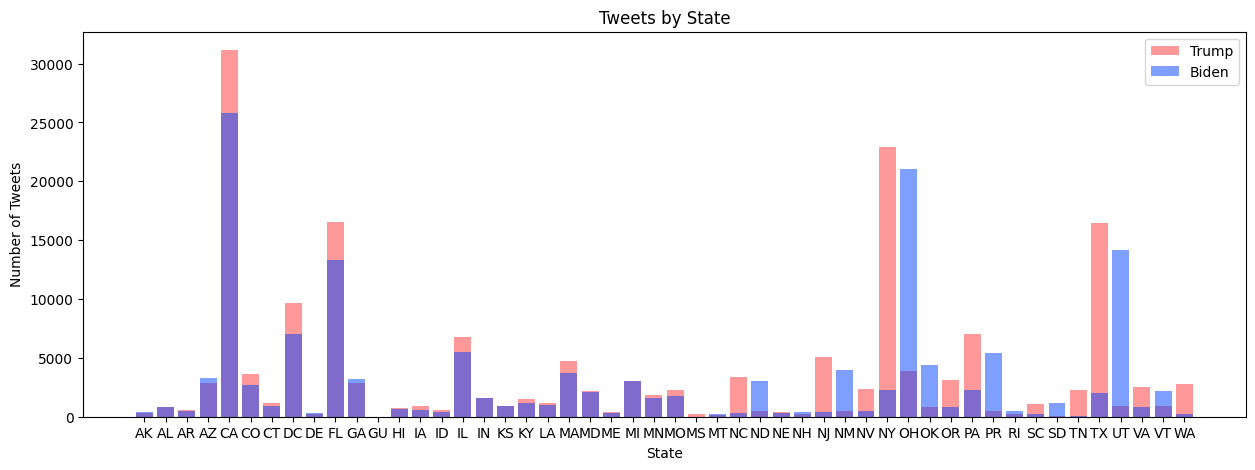

In [ ]:
# Plotting state distributions 
import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt

states = by_state_t['state_code']
num_tweets_t = by_state_t['COUNT(state_code)']
num_tweets_b = by_state_b['COUNT(state_code)']
plt.figure(figsize=(15, 5))
plt.bar(states, num_tweets_t, align='center', alpha=0.5, color=(1, 0.2, 0.2, 0))
plt.bar(states, num_tweets_b, align='center', alpha=0.5, color=(0, 0.25, 1, 0))

plt.ylabel('Number of Tweets')
plt.xlabel('State')
plt.title('Tweets by State')
plt.legend(['Trump', 'Biden'])
plt.show()

states = by_state_t['state_code']
worth = np.array([.01, .05, .10, .25])


In [ ]:
by_state_t['COUNT(state_code)']

In [ ]:
# Exporting cleaned df as csv for upload into CSCI403 DB
from google.colab import files
clean_t.to_csv('clean_t.csv')
#files.download('clean_t.csv') 

In [ ]:
clean_b.to_csv('clean_b.csv')
#files.download('clean_b.csv')

In [ ]:
tweet_text_t = clean_t['tweet']
tweet_text_b = clean_b['tweet']


In [ ]:
tweet_text_t.to_csv('tweet_text_t.csv')
files.download('tweet_text_t.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
tweet_text_b.to_csv('tweet_text_b.csv')
#files.download('tweet_text_b.csv')

In [ ]:
clean_t.columns

Index(['created_at', 'tweet', 'likes', 'retweet_count', 'user_name',
       'user_screen_name', 'user_description', 'user_join_date',
       'user_followers_count', 'user_location', 'country', 'continent',
       'state_code'],
      dtype='object')